<font face="Calibri" size="2"> <i>SBAE - Notebook Series - Part II, version 0.2,  May 2023. Andreas Vollrath, UN-Food and Agricultural Organization, Rome</i>
</font>

![titre](images/header.png)

# II - Plan d'échantillonnage
### Création d'échantillons ponctuels pour l'extraction et l'analyse ultérieures de séries chronologiques
-------

#### **Introduction**

La base de l'approche eSBAE est une grille dense qui capture le changement à un niveau de confiance suffisant. Un plan d'échantillonnage systématique doit être utilisé. Ce bloc-notes fournit la fonctionnalité permettant de créer une telle grille sur l'AOI donnée (définie dans le bloc-notes 1).

Deux formes de grille sont disponibles, c'est-à-dire une grille carrée ou hexagonale. De plus, il est nécessaire de déterminer la taille de chaque cellule de la grille ainsi que la projection.

#### **Grille carrée**

Les grilles carrées sont un moyen simple de créer une grille. Ils sont utilisés pour diverses applications géospatiales. La taille de grille de la grille carrée est sélectionnée en mètres, définissant la longueur de bordure unique de chaque cellule de grille.

#### **Grille hexagonale**

Dernièrement, les grilles hexagonales ont été adaptées dans les systèmes nationaux de surveillance des forêts car elles possèdent certaines caractéristiques particulières. Avant tout, ils réduisent l'erreur sur la surface, mais ils garantissent également que chaque point dans la cellule de la grille est plus ou moins à la même distance du centre. En effet, la forme idéale selon ce critère serait un cercle. Il n'est cependant pas possible de créer une grille cohérente de cercles. L'hexagone est la forme de polygone qui se rapproche le plus de ce critère, tout en étant capable de fournir un maillage cohérent.

Le bloc-notes fournit une interface simplifiée à la bibliothèque de logiciels dggrid de [Southern Oregon University](https://www.discreteglobalgrids.org/software/).
DGGRID contient du code pour générer des grilles hexagonales standardisées basées sur un * Discrete Global Grid System (DGGS) * avec un ensemble de résolutions prédéfinies pour des projections spécifiques optimisées pour une surface égale.

Il est important de comprendre que DGGRID a un **ensemble fixe de résolutions** qui doit être sélectionné dans la colonne *res* du tableau ci-dessous (vous devez consulter le manuel pour d'autres résolutions si vous sélectionnez une projection différente de l'ISEA3H)

Pour une utilisation avancée, il est recommandé de consulter le [manuel](https://webpages.sou.edu/~sahrk/docs/dggridManualV70.pdf).

![titre](images/dggrid_isea3h_ap3_res_table.png)

#### **Stratégies d'échantillonnage**

Le cahier permet de choisir parmi 2 stratégies d'échantillonnage dans chaque cellule de la grille, *centroïde* et *aléatoire*. Le centre de gravité prendra le point central en fonction de la projection sélectionnée, tandis que l'option aléatoire


#### ***Projections***

Lors de la création d'échantillons, une considération importante est la projection utilisée. Les projections présentent toujours des distorsions par rapport à la forme sphérique réelle de la Terre. Comme notre objectif est de donner à chaque échantillon le même poids en termes de représentativité de surface, nous sélectionnerons une projection optimisée pour **surface égale**.

##### **Projections de grille carrée**

Dans le tableau ci-dessous, vous trouverez quelques exemples de projections globales à surface égale parmi lesquelles choisir. Les informations sont tirées d'un article de Yildrim & Kaya 2008 et peuvent être trouvées [ici](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3790990/#:~:text=The%20level% 20des%20distorsions%20peuvent,par rapport%20à%20égales%2Darea%20maps). **Notez** que la projection Lat/Lon couramment utilisée (EPSG:4326) **ne** contient pas de distorsions qui doivent être évitées.

| **Projection** | **Code** |
| ------------- |----------------|
| Behrmann | ESRI :54017 |
| Bonne | ESRI :54024 |
| Sinusoïdal | ESRI :54008 |


##### ** Projections de grille hexagonale et taille de grille **

Par défaut, la projection ISEA3H est utilisée. Consultez le [manuel dggrid](https://webpages.sou.edu/~sahrk/docs/dggridManualV70.pdf) pour d'autres options de projections.

### Importer les librairies

In [1]:
import ee
# initialize EE    
try:
    ee.Initialize()
except:
    ee.Authenticate()
    ee.Initialize()
    
from sampling_handler import SampleDesign

/usr/local/share/jupyter/kernels/venv-eSBAE_notebooks/venv/lib/python3.8/site-packages/bfast/__init__.py:10: UserWarning: cupy is not available in this environment, GPU fonctionnalities won't be available
  warn("cupy is not available in this environment, GPU fonctionnalities won't be available")


#### 2 - Initialiser la classe SampleDesign

Dans la cellule ci-dessous, nous initialisons la classe SampleDesign

1. Forme de la grille : définit la forme que doit avoir la grille systématique sous-jacente. Les choix sont carrés ou hexagonaux.
2. Stratégie d'échantillonnage : Ici, il est défini si le point d'échantillonnage est défini au centre ou à un point aléatoire dans chaque cellule de la grille.
3. Projection de la grille (comme code epsg/esri) : Comme décrit ci-dessus, la projection est une partie importante lors de la création de la grille. Cependant, les projections à surface égale ne sont pas les projections les plus couramment utilisées. La routine est capable d'utiliser un système de grille différent en interne pour créer la grille et/ou placer le centroïde. Notez que lorsque vous avez sélectionné une grille hexagonale, cette projection n'est utilisée que pour le placement du centroïde.
4. Projection de sortie : cela définira la projection du fichier de sortie final, indépendamment de la projection de la grille définie. Pour cela, il peut aussi s'agir d'une projection qui n'est pas idéale pour la création de grilles d'échantillonnage telles que Lat/Long.


#### 1.2 - Créer des cellules de grille et des points d'échantillonnage pour une grille carrée

In [2]:
esbae = SampleDesign(
    
    # set your project's name (NEEDS to be the same as in notebook 1)
    # no space allowed, use _ instead
    project_name='esbae_congo',
    
    # defines the underlying grid, 
    # choices: 'squared', 'hexagonal'
    shape='hexagonal',              
    
    # defines where the sample is placed within the grid, 
    # choices: 'random', 'centroid'
    strategy='centroid',          
    
    # defines the projection in which the grid is generated,
    # for hexagonal it applies to the centroid calculation only, as dggrid uses its own projection
    grid_crs="ESRI:54017",
    
     # defines the projection in which the grid is saved
    out_crs='EPSG:4326',
    
    # This is in case you haven't run notebook 1 and want to directly start from here
    # aoi = ee.FeatureCollection('my_ee_feature_collection')
)

INFO: Using existing project directory at /home/sepal-user/module_results/esbae/esbae_congo
INFO: Using existent config file from project directory /home/sepal-user/module_results/esbae/esbae_congo


### 2 - Créer une grille

Un autre aspect important est la taille de la grille. **NOTEZ** que la taille de la grille est sélectionnée différemment pour les grilles carrées et hexagonales.
Une grille carrée est simplement définie par la distance entre chaque point (qui est identique à une seule longueur de bordure de la grille sous-jacente).

La grille hexagonale, au contraire, repose sur un système hiérarchique et a des résolutions fixes (voir Espacement des entre-nœuds dans le tableau ci-dessus). De plus, il utilise une projection très spécifique optimisée pour les projections à surface égale utilisant des hexagones. 

In [3]:
# Those parameters apply to squared grid only (otherwise ignored)
esbae.squared_grid_size = 10000

# Those parameters apply to hexagonal grid only
esbae.dggrid_resolution = 12     # this relates to the res column from the table above
esbae.dggrid_projection = 'ISEA3H'

# generation of grid
c, p = esbae.generate_samples(upload_to_ee=True, save_as_ceo=True)

INFO: Verifying parameter settings...
INFO: Creating hexagonal grid...
INFO: Adding a unique point ID...
INFO: Final sampling design consists of 3570 samples.
INFO: Grid cells are saved locally.
INFO: Point samples are saved locally as GeoPackage and CEO file.
INFO: Grid cells are being uploaded to GEE. This may take a while...
INFO: Point samples are being uploaded to GEE. This may take a while...


#### 3 - Tracez une grille hexagonale et enregistrez la figure

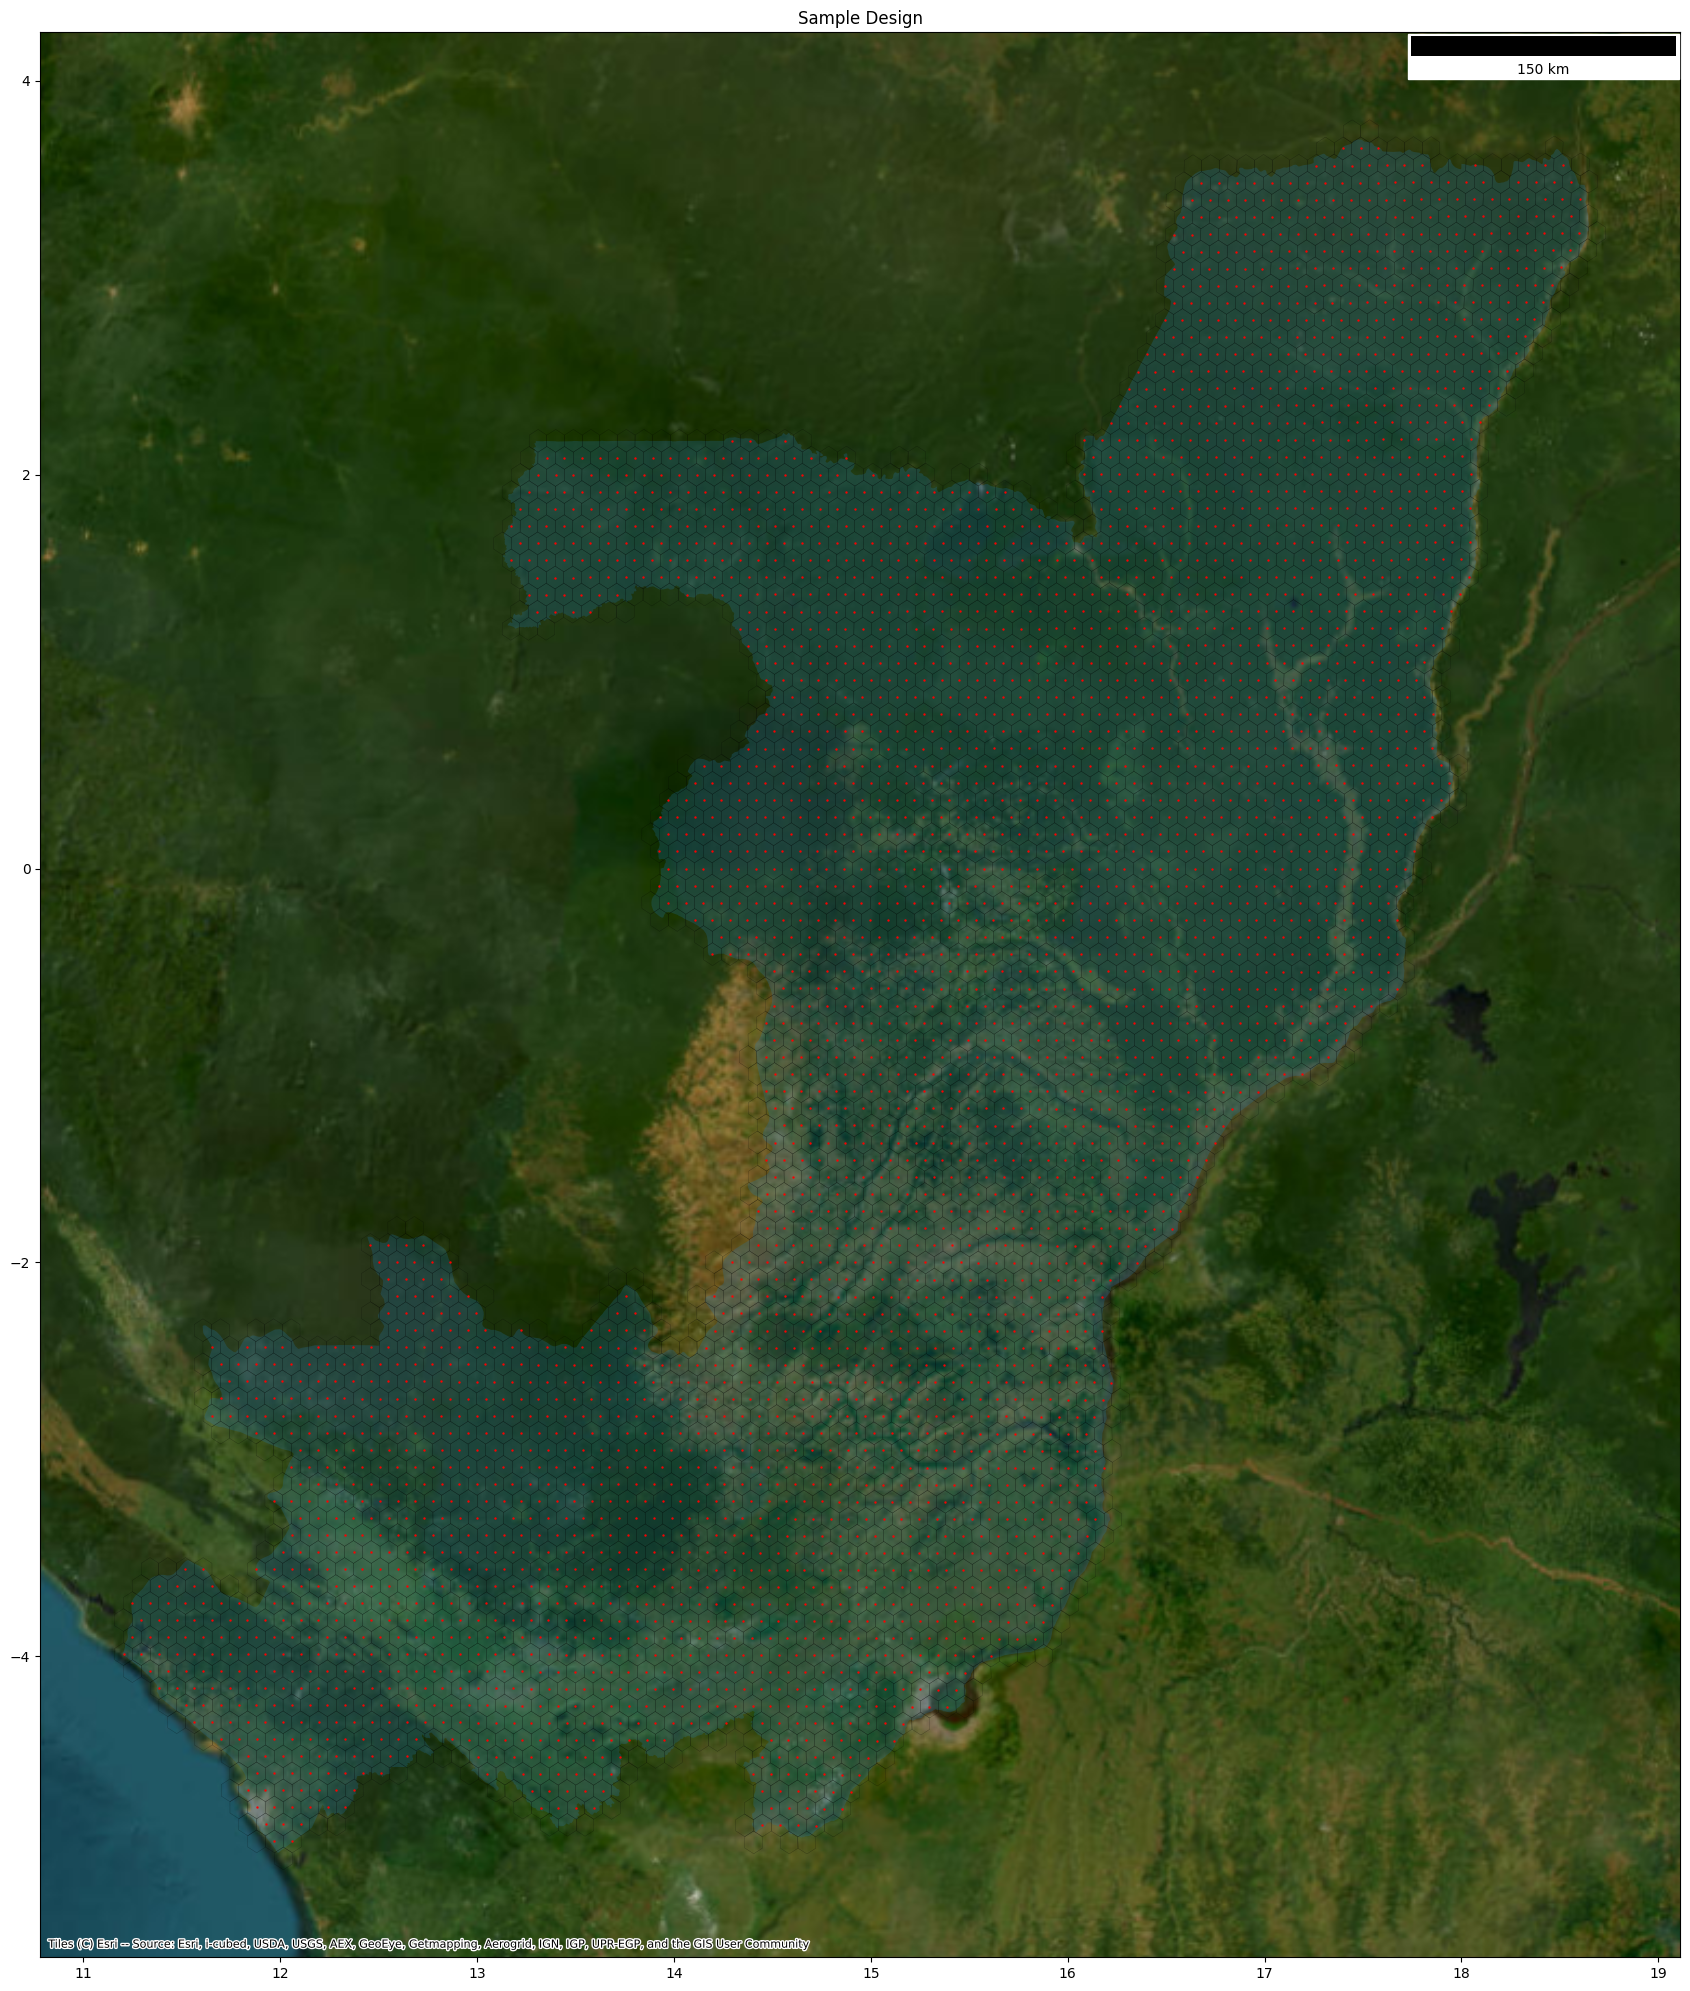

In [4]:
esbae.plot_samples()